# London Housing Market Analysis (1995-2019)

This notebook analyzes London's housing market data including:
- Monthly average house prices
- Yearly number of houses sold
- Monthly crime statistics

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Configure visualization settings
plt.style.use('ggplot')
sns.set_palette('husl')
%matplotlib inline

## Data Loading and Initial Inspection

In [21]:
df = pd.read_csv("Housing_Dataset.csv")
print(f"Data loaded successfully with {df.shape[0]} records spanning {df.shape[1]} features")

Data loaded successfully with 13549 records spanning 6 features


## Data Quality Assessment

In [22]:
print("\n=== Data Completeness ===")
print("Record counts per column:")
print(df.count())


=== Data Completeness ===
Record counts per column:
date             13549
area             13549
average_price    13549
code             13549
houses_sold      13455
no_of_crimes      7439
dtype: int64


In [23]:
print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values)


=== Missing Values ===
date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64


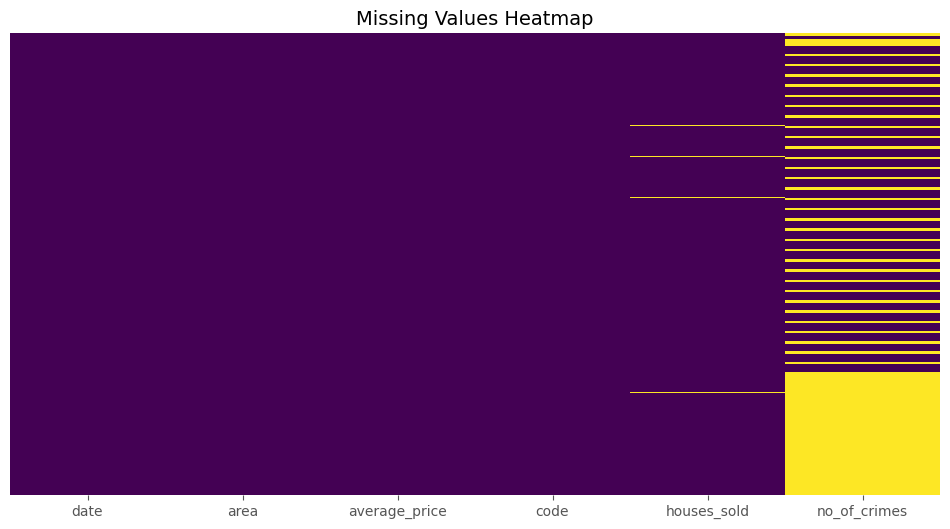

In [24]:
# Visualize missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap', fontsize=14)
plt.show()

## Data Preparation

In [25]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
    
# Extract year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
    
# Reorder columns for better readability
column_order = ['date', 'year', 'month'] + [col for col in df.columns if col not in ['date', 'year', 'month']]
df = df[column_order]

## Housing Market Analysis

In [26]:
# (A) Date conversion already handled in preparation
    
# (B.1 & B.2) Year and month columns already added
    
# (C) Remove year and month columns (demonstration only)
print("\n=== Removing Year and Month Columns (Demonstration) ===")
temp_df = df.drop(['year', 'month'], axis=1)
display(temp_df.head())


=== Removing Year and Month Columns (Demonstration) ===


,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN
2,1995-03-01,city of london,79121,E09000001,14.0,NaN
3,1995-04-01,city of london,77101,E09000001,7.0,NaN
4,1995-05-01,city of london,84409,E09000001,10.0,NaN


In [27]:
# (D) Areas with zero crimes
print("\n=== Areas with Zero Reported Crimes ===")
zero_crimes = df[df['no_of_crimes'] == 0]
print(f"Found {len(zero_crimes)} records with zero crimes")
display(zero_crimes.head())


=== Areas with Zero Reported Crimes ===
Found 104 records with zero crimes


,date,year,month,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,2001,1,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,2001,2,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,2001,3,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,2001,4,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,2001,5,city of london,223459,E09000001,30.0,0.0


In [28]:
# (E) Price trends in England
print("\n=== Price Trends in England ===")
england_data = df[df['area'] == 'england']
england_prices = england_data.groupby('year')['average_price'].agg(['min', 'max', 'mean'])
england_prices.columns = ['Min Price', 'Max Price', 'Mean Price']
display(england_prices.style.format("{:,.2f}").background_gradient(cmap='Blues'))


=== Price Trends in England ===


,Min Price,Max Price,Mean Price
year,,,
1995,"52,788.00","53,901.00","53,322.42"
1996,"52,333.00","55,755.00","54,151.50"
1997,"55,789.00","61,564.00","59,160.67"
1998,"61,659.00","65,743.00","64,301.67"
1999,"65,522.00","75,071.00","70,070.75"
2000,"75,219.00","84,191.00","80,814.33"
2001,"84,245.00","95,992.00","90,306.75"
2002,"96,215.00","119,982.00","107,981.50"
2003,"121,610.00","138,985.00","130,218.58"


In [29]:
# (F) Crime statistics by area
print("\n=== Crime Statistics by Area ===")
crime_stats = df.groupby('area')['no_of_crimes'].agg(['min', 'max', 'mean', 'count'])
crime_stats.columns = ['Min Crimes', 'Max Crimes', 'Mean Crimes', 'Record Count']
display(crime_stats.sort_values('Max Crimes', ascending=False).head(10).style.format("{:,.2f}"))


=== Crime Statistics by Area ===


,Min Crimes,Max Crimes,Mean Crimes,Record Count
area,,,,
westminster,"3,504.00","7,461.00","5,291.45",229.00
lambeth,"2,381.00","4,701.00","3,141.72",229.00
camden,"2,079.00","4,558.00","3,056.57",229.00
southwark,"2,267.00","3,821.00","3,028.56",229.00
newham,"2,130.00","3,668.00","2,851.43",229.00
hackney,"1,870.00","3,466.00","2,575.75",229.00
ealing,"1,871.00","3,401.00","2,607.06",229.00
islington,"1,871.00","3,384.00","2,515.99",229.00
tower hamlets,"1,646.00","3,316.00","2,542.25",229.00


In [30]:
# (G) Affordable areas (price < £100,000)
print("\n=== Areas with Average Price Below £100,000 ===")
affordable_areas = df[df['average_price'] < 100000]['area'].value_counts()
print(f"Found {len(affordable_areas)} areas with affordable pricing")
display(affordable_areas.head(10))


=== Areas with Average Price Below £100,000 ===
Found 40 areas with affordable pricing


area
north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
Name: count, dtype: int64

## Time Series Visualizations

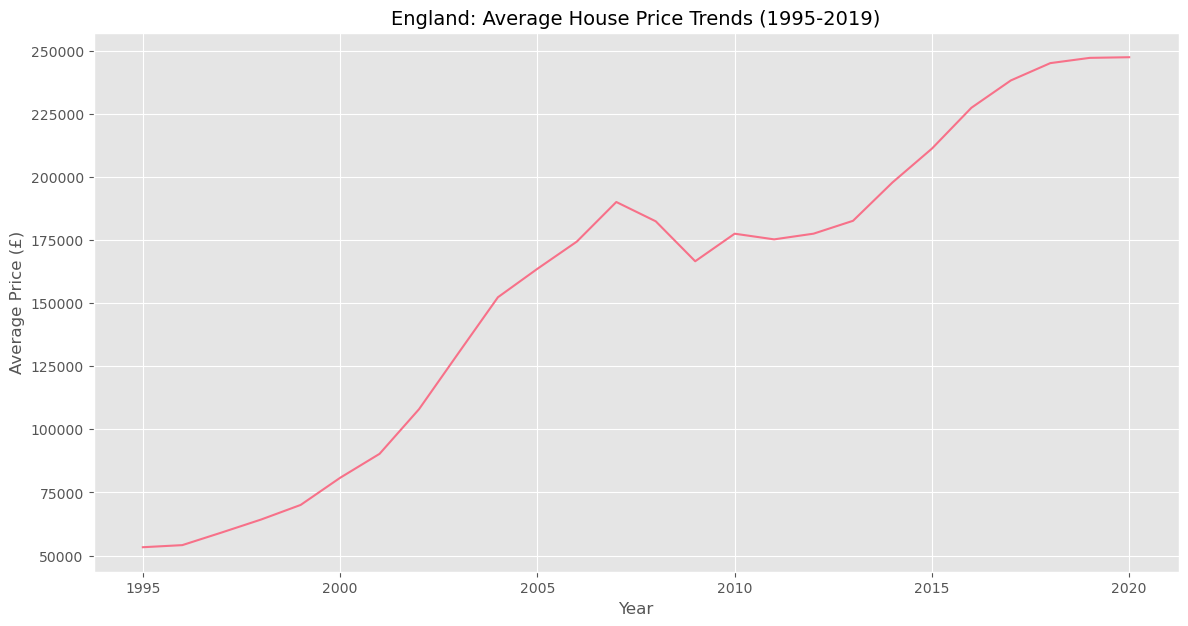

In [31]:
# England price trends over time
england_data = df[df['area'] == 'england']
plt.figure(figsize=(14, 7))
sns.lineplot(data=england_data, x='year', y='average_price', 
                estimator='mean', errorbar=None)
plt.title('England: Average House Price Trends (1995-2019)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.grid(True)
plt.show()

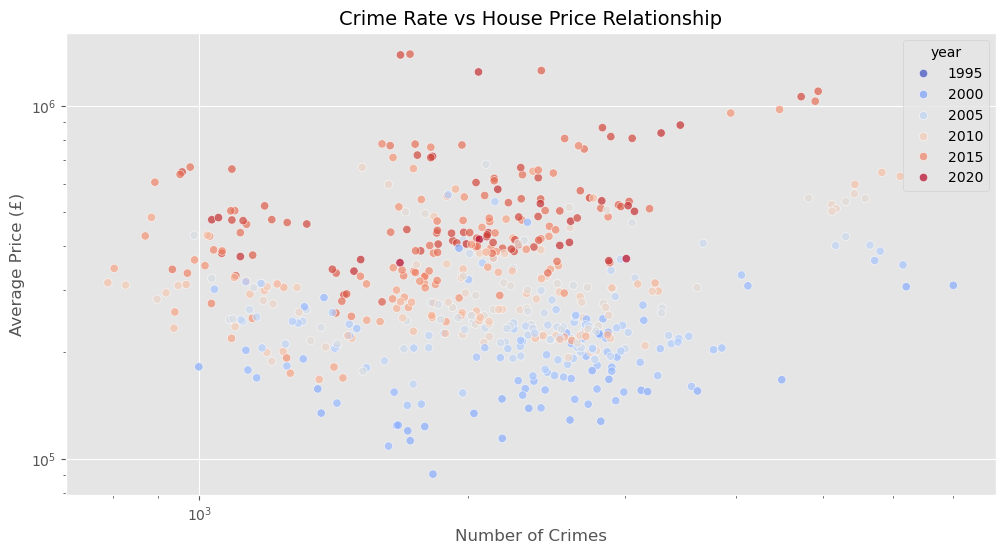

In [32]:
# Crime vs Price relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df.sample(1000), x='no_of_crimes', y='average_price', 
                hue='year', palette='coolwarm', alpha=0.7)
plt.title('Crime Rate vs House Price Relationship', fontsize=14)
plt.xlabel('Number of Crimes')
plt.ylabel('Average Price (£)')
plt.xscale('log')
plt.yscale('log')
plt.show()